# Module 4
## Section: Linear Regression

## Lab 2: Advanced Linear Regression

### Shortcomings of linear regression?
***
1. Main limitation of Linear Regression is the assumption of linearity between the dependent variable and the independent variables. In the real world, the data is rarely linearly separable. It assumes that there is a straight-line relationship between the dependent and independent variables which is incorrect many times.

2. Prone to noise and overfitting: If the number of observations are lesser than the number of features, Linear Regression should not be used, otherwise it may lead to overfit because is starts considering noise in this scenario while building the model.

3. Prone to outliers: Linear regression is very sensitive to outliers (anomalies). So, outliers should be analyzed and removed before applying Linear Regression to the dataset.

4. Prone to multicollinearity: Before applying Linear regression, multicollinearity should be removed (using dimensionality reduction techniques) because it assumes that there is no relationship among independent variables.

***



# Objective
***
- Polynomial Basis Function
- Regularization(L1/L2)

<br><br><br><br><br><br>
## Objective
***
- Underfitting
- Polynomial Regression - Introduction
- Polynomial Basis Function - Mathematical Representation
- What is a Polynomial Feature Transformer?
- Overfitting
- Concept of Regularization
	- L1 Regularization (also called as Lasso penalisation)
		- Understanding L1
		- Lasso - Implementation
	- L2 Regularization (also called as Ridge penalisation) 
		- Understanding L2
		- Ridge - Implementation
	- L1 vs L2 Regularization
	- Ridge or Lasso ?
 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

np.random.seed(9)

- Till now we have learnt to fit a simple linear regression model and we have done this on the house-price prediction dataset.
- We have predicted the Price of a House given its Area 
- However, with further analysis, these predictions can be improved!

<br><br><br><br><br><br>
## Underfitting
***

Underfitting is when the the model *fails to capture the overall 'trend' of the data.* For example: The linear model will do an extremely poor job of explaining the target variable if we fitted to nonlinear data. It will *oversimplifies* the model.

A model that underfits is said to have **high bias.**

- Bias is the difference between predictions and truths using models trained by specific learning algorithm

- Error due to bias is because we assumed that simple linear model will fit a non linear data distribution  while specifying the  algorithm

- Basically, we are biased toward the data having a linear trend and we hypothesize that our target variable increases linearly EVEN THOUGH WE CAN SEE A CLEAR NON-LINEAR TREND 



<br><br><br>
### What is the issue here?

A linear model is not able to fit the non-linear data. 

- But then can a non-linear curve do the job?



<br><br><br>
## Polynomial Regression - Introduction
***


* One way to tackle underfitting is through polynomial functions. Let's see the implementation of this technique.


<br><br><br><br><br><br>
## Polynomial Basis Function - Mathematical Representation
***

* In many settings, such a linear relationship may not hold. For example, if we are modeling the yield of a chemical synthesis in terms of the temperature at which the synthesis takes place, we may find that the yield improves by increasing amounts for each unit increase in temperature. In this case, we might propose a quadratic model of the form
    $$ y = \beta_{0}+\beta_{1}x+\beta_{2}x^2+\varepsilon. $$
<br/>
* In general, we can model the expected value of y as an nth degree polynomial, yielding the general polynomial regression model
    $$ y = \beta_{0}+\beta_{1}x+\beta_{2}x^2+\cdots +\beta_{n}x^n+\varepsilon. $$
<br/>
the above is what is known as **polynomial basis function**  
 <br/>
* Polynomial projection is built into Scikit-Learn, using the ``Polynomial Features`` transformer:

<br><br><br>
## What is a Polynomial Feature Transformer? 

 - This is nothing but taking the *n-th* degree of your variable
 - Below is an easy example to display what it does
     - Say we wanted to take the 1st, 2nd and 3rd degree of the numbers 2,3 & 4. 
     - Intuitively we know that for 2 the 1st, 2nd and 3rd degrees are: 2, 4 $(2^2)$ and 8 $(2^3)$
 
 - Let's try and understand the code below: 

In [3]:
#code to improvise polynomial regression model and increase the accuracy 

from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Here the 3 in "PolynomialFeatures(3, include_bias=False)" is basically the value of degree of the polynomials up to which we want our data to be transformed to 

- We can see 3 values for 2,3 and 4. For example: $4^1$ (4), $4^2$ (16) and $4^3$ (64)

**Now, let's use the same technique to create a 7th-degree polynomial model for the non-linear data generated  earlier **

In [4]:
#make_pipeline() just like Pipeline() is used to perform a sequence of different transformations on a raw dataset before applying the final estimator. 

from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())  

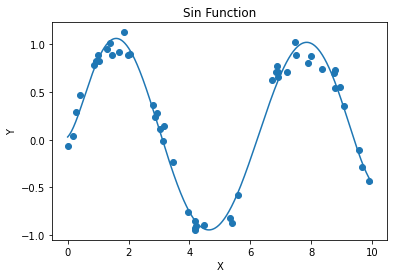

In [5]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Sin Function");

7th-order polynomial basis function can provide an excellent fit to this non-linear data.

There are many advantages of using Polynomial Regression as-
-  Broad range of functions can be fit over model
-  Polynomial function fits a wide range of curvature 
-  It provides a good approximation of the relationship and makes the transformation more interpretable.

<br><br><br><br><br><br>
## Overfitting 
***

Overfitting occurs when your model follows the training dataset very rigorously i.e it gives low training error, but it may not work well on generalized or test dataset i.e. it may give a high generalization error. 

For example- It's like a person cramming word to word from a book while studying for his exams. If the questions in the test are straight as in the book, he will do well, else if the questions are more based on usage of multiple concepts outlined in the book he studied, and not directy stated, the person may struggle.

<img src="https://raw.githubusercontent.com/bluedataconsulting/AIMasteryProgram/main/Lab_Exercises/Module4/images/underfitting_overfitting.png" width=500 height=250><br/>

<br/><br/>
An overfitting model is said to have high variance.

We will discuss about bias and variance soon.

<br><br><br><br><br><br>
## Concept of Regularization
***
<br/>
Regularizations techniques are used to reduce the error by fitting a function appropriately on the given training set to avoid overfitting.
Let's build an intuition with the help of an example 
 

* Let's say a parent is very cautious about the future of his children 
* He wants them to be successful in life without being strict with them. He takes a decision about how much flexibility should be given to his children during their upbringing. 

**Too much restriction may suppress their development of character,however; Too much flexibility may spoil them.**

- He decides to overcome this situation with the idea of regularized(regularization) flexibility, which is to give enough flexibility added with some restrictions. 


The overfitting behaviour occurs when basis functions overlap:
- The coefficients of adjacent basis functions grow large and cancel each other out.
- We need to limit such spikes explicitly in the model by penalizing large values of the model parameters (the thetas of variables)
- Such a penalty is known as regularization.

It can be done through-
-  L1 Regularization (also called as Lasso Penalization/Regression)
-  L2 Regularization (also called as Ridge Penalization/Regression)

<br><br><br>
## L1 Regularization (also called as Lasso penalisation)
***
<br />
Involves penalising sum of absolute values (1-norms) of regression coefficients<br/>
Here the Penalty (P) on the model will be:
$$ P=\alpha\sum_{i=1}^{n}\left | \theta_{n} \right | $$
<br/>

And the cost function would be:<br/>
$$ J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}x^{(i)}-y^{(i)})^2 + \alpha\sum_{n=1}^{N}\left | \theta_{n} \right | $$


<br><br><br>
### Understanding L1

 - Here we are familiar with the First half of the Cost Function. 
 
 - By adding all thetas to the cost function, which we want to minimize, we're adding further restrictions on these parameters
 
 - Notice how $\theta_{0}$ is not in the formula for P as the limits start from i=1 to i=n there, as we're not penalizing our Intercept

<br><br><br>
### Lasso - Implementation 

- The  α  parameter in Lasso tunes the strength of the penalty, and should be determined via cross-validation. (What is cross-validation? Later below)

- Let's use Lasso on our model and see how it performs 

In [6]:
# Loading the dataset
import pandas as pd
data = pd.read_csv("house_prices_multivariate.csv")
data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000


In [7]:
# Splitting data 
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data['SalePrice']

# split the data with 50% in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, train_size=0.5)

In [8]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error,r2_score


lasso_model=Lasso(alpha=140, max_iter=100000, random_state=9)

# fit the model on one set of data
lasso_model.fit(X_train, y_train)

# evaluate the model on the second set of data
y_pred = lasso_model.predict(X_test)

mean_squared_error(y_test, y_pred)

# Getting the r2 score
r2_score(y_test, y_pred)

0.7689282903544467

<br><br><br><br><br><br>
## L2 Regularization (also called as Ridge penalisation) 
***
<br />
This proceeds by penalising the sum of squares (2-norms) of the model coefficients<br/>
Here the Penalty (P) on the model will be:
$$ P=\alpha\sum_{i=1}^{n}\theta_{n}^{2}  $$
<br/>
And the cost function would be:<br/>
$$ J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}x^{(i)}-y^{(i)})^2 + \alpha\sum_{n=1}^{N} \theta_{n}^{2} $$


<br><br><br>
### Understanding L2

- The L2 regularization will force the parameters to be relatively small, the bigger the penalization, the smaller (and the more robust to overfitting) the coefficients are
- Here we are considering every feature but we are penalizing the coefficients based on how significant the feature is

Here,  α is a hyper-parameter that controls the strength of the penalty.
The  α parameter controls complexity of the resulting model.
- In the limit  α→0 , we recover the standard linear regression result.
- In the limit  α→∞ , all model responses will be suppressed.

Ridge regression can be computed very efficiently at hardly any computational cost than the original linear regression model.
This type of penalized model is built into Scikit-Learn with the Ridge estimator.



<br><br><br>
### Ridge - Implementation 

In [9]:
ridge_model=Ridge(alpha=0.00001, max_iter=100000, random_state=9)

# fit the model on one set of data
ridge_model.fit(X_train, y_train)

# evaluate the model on the second set of data
y_pred = ridge_model.predict(X_test)
mean_squared_error(y_test, y_pred)
r2_score(y_test,y_pred)

0.7685337209181896


<br><br><br>
## L1 vs L2 Regularization
***

<img src="https://raw.githubusercontent.com/bluedataconsulting/AIMasteryProgram/main/Lab_Exercises/Module4/images/L1_L2.png" width=500 height=250><br/>

<br><br><br>
## Ridge or Lasso ?
***


* Let's say we have a large dataset which has 10,000 features. 
* And some of the independent features are correlated with other independent features. 

**Which one would suit better, Rigde or Lasso?**




* If we apply **ridge regression** to it, it will retain all of the features but will **shrink the coefficients**. Still the problem is that model will remain complex as there are 10,000 features, thus may lead to poor model performance.

* If we apply **lasso regression** to this problem, the main problem will be when we have correlated variables, it would retain only one variable and set other correlated variables to zero. 
* That will possibly lead to some loss of information resulting in lower accuracy in our model.



### Thank You